# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [2]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("abalone.csv")
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [4]:
df.shape

(4177, 9)

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df.Rings

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [11]:
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

# Data Visulation

<AxesSubplot:>

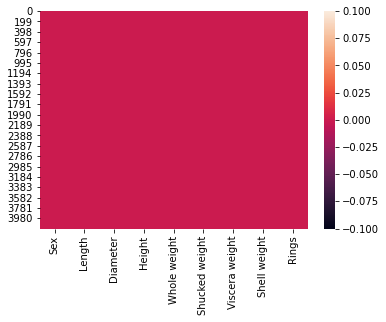

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Frequency'>

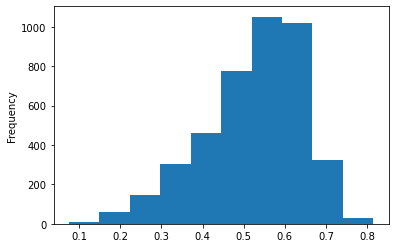

In [13]:
df['Length'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

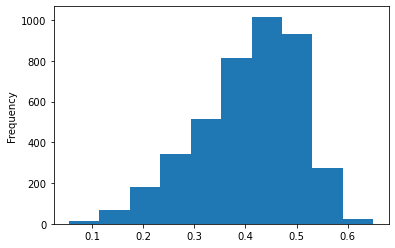

In [14]:
df['Diameter'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

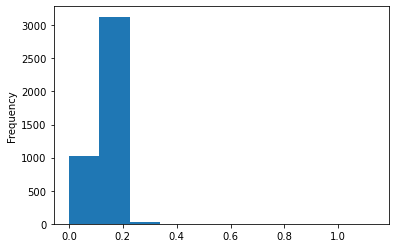

In [15]:
df['Height'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

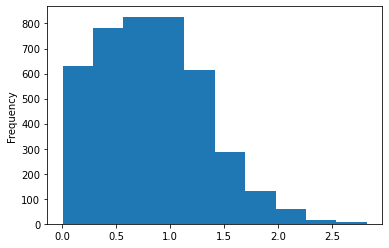

In [16]:
df['Whole weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

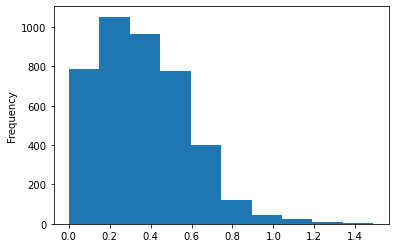

In [17]:
df['Shucked weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

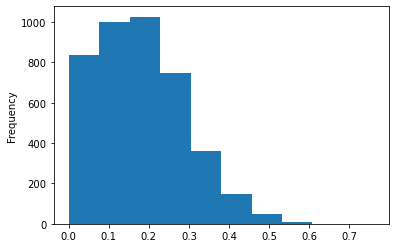

In [18]:
df['Viscera weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

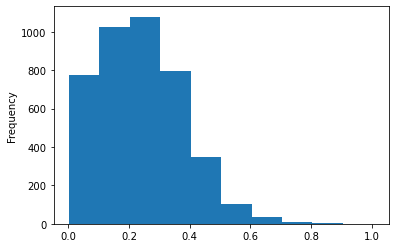

In [19]:
df['Shell weight'].plot.hist()

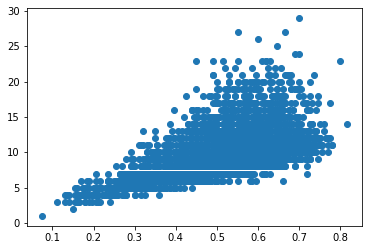

In [20]:
plt.scatter(data = df,x ='Length',y = 'Rings')
plt.show()

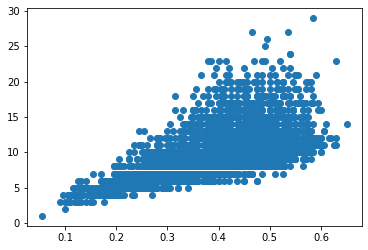

In [21]:
plt.scatter(data = df,x  = 'Diameter',y = 'Rings')
plt.show()

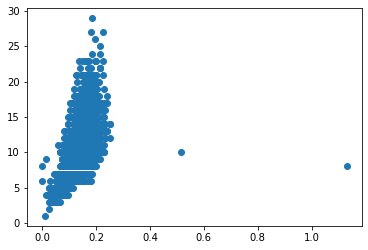

In [22]:
plt.scatter(data = df,x ='Height',y = 'Rings')
plt.show()

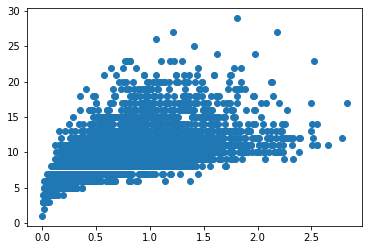

In [23]:
plt.scatter(data = df,x ='Whole weight',y = 'Rings')
plt.show()

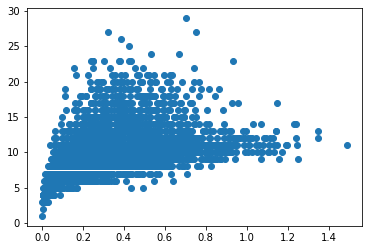

In [24]:
plt.scatter(data = df,x ='Shucked weight',y = 'Rings')
plt.show()

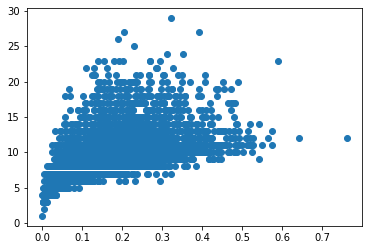

In [25]:
plt.scatter(data = df,x ='Viscera weight',y = 'Rings')
plt.show()

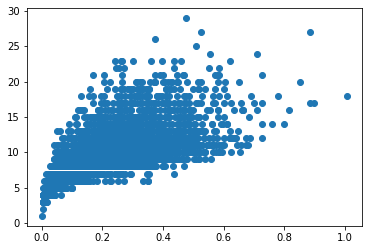

In [26]:
plt.scatter(data = df,x ='Shell weight',y = 'Rings')
plt.show()

<AxesSubplot:xlabel='Length', ylabel='Rings'>

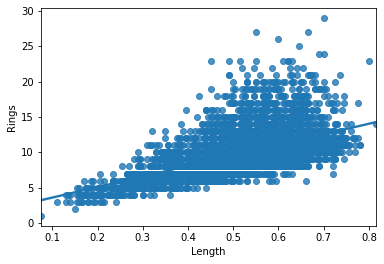

In [27]:
sns.regplot(data =df,x = "Length",y = "Rings")

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

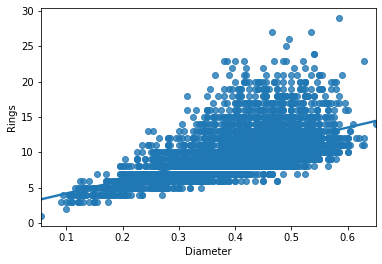

In [28]:
sns.regplot(data =df,x = "Diameter",y = "Rings")

<AxesSubplot:xlabel='Height', ylabel='Rings'>

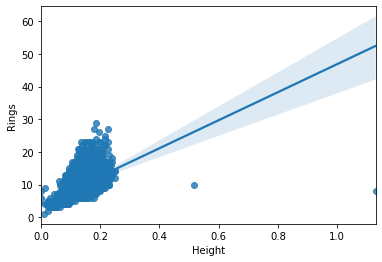

In [29]:
sns.regplot(data =df,x = "Height",y = "Rings")

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

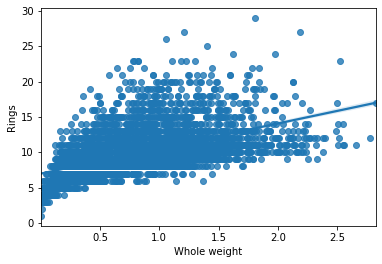

In [30]:
sns.regplot(data =df,x = "Whole weight",y = "Rings")

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

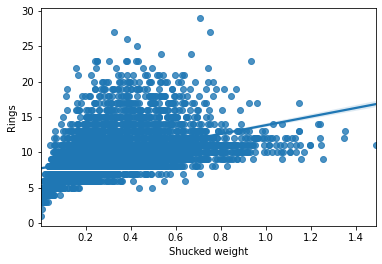

In [31]:
sns.regplot(data =df,x = "Shucked weight",y = "Rings")

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

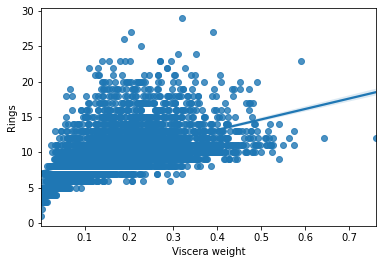

In [32]:
sns.regplot(data =df,x = "Viscera weight",y = "Rings")

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

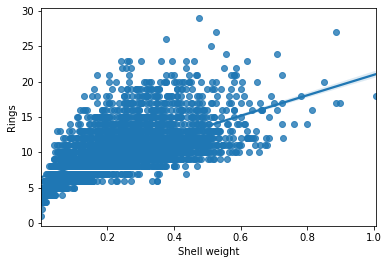

In [33]:
sns.regplot(data =df,x = "Shell weight",y = "Rings")

<AxesSubplot:xlabel='Length', ylabel='Density'>

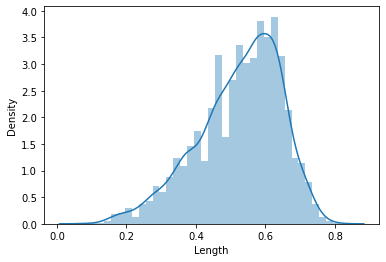

In [34]:
sns.distplot(df["Length"])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

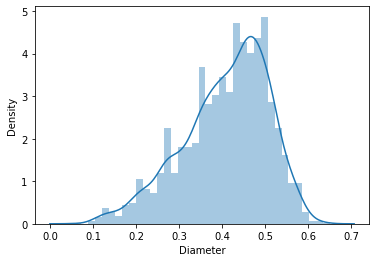

In [35]:
sns.distplot(df ["Diameter"])

<AxesSubplot:xlabel='Height', ylabel='Density'>

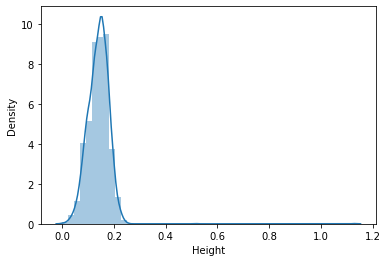

In [36]:
sns.distplot(df["Height"])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

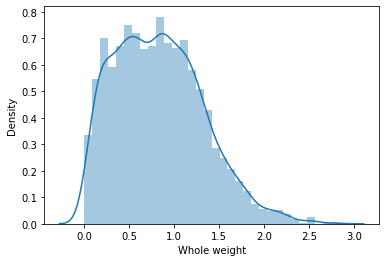

In [37]:
sns.distplot(df["Whole weight"])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

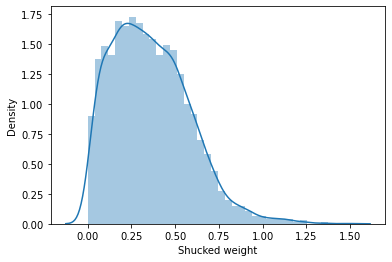

In [38]:
sns.distplot(df["Shucked weight"])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

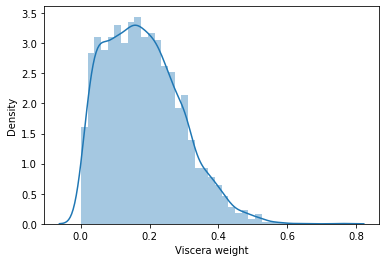

In [39]:
sns.distplot(df["Viscera weight"])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

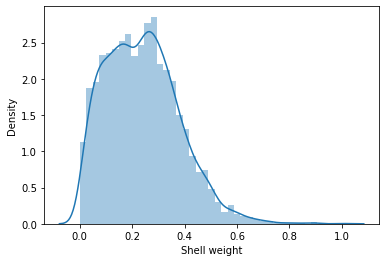

In [40]:
sns.distplot(df["Shell weight"])

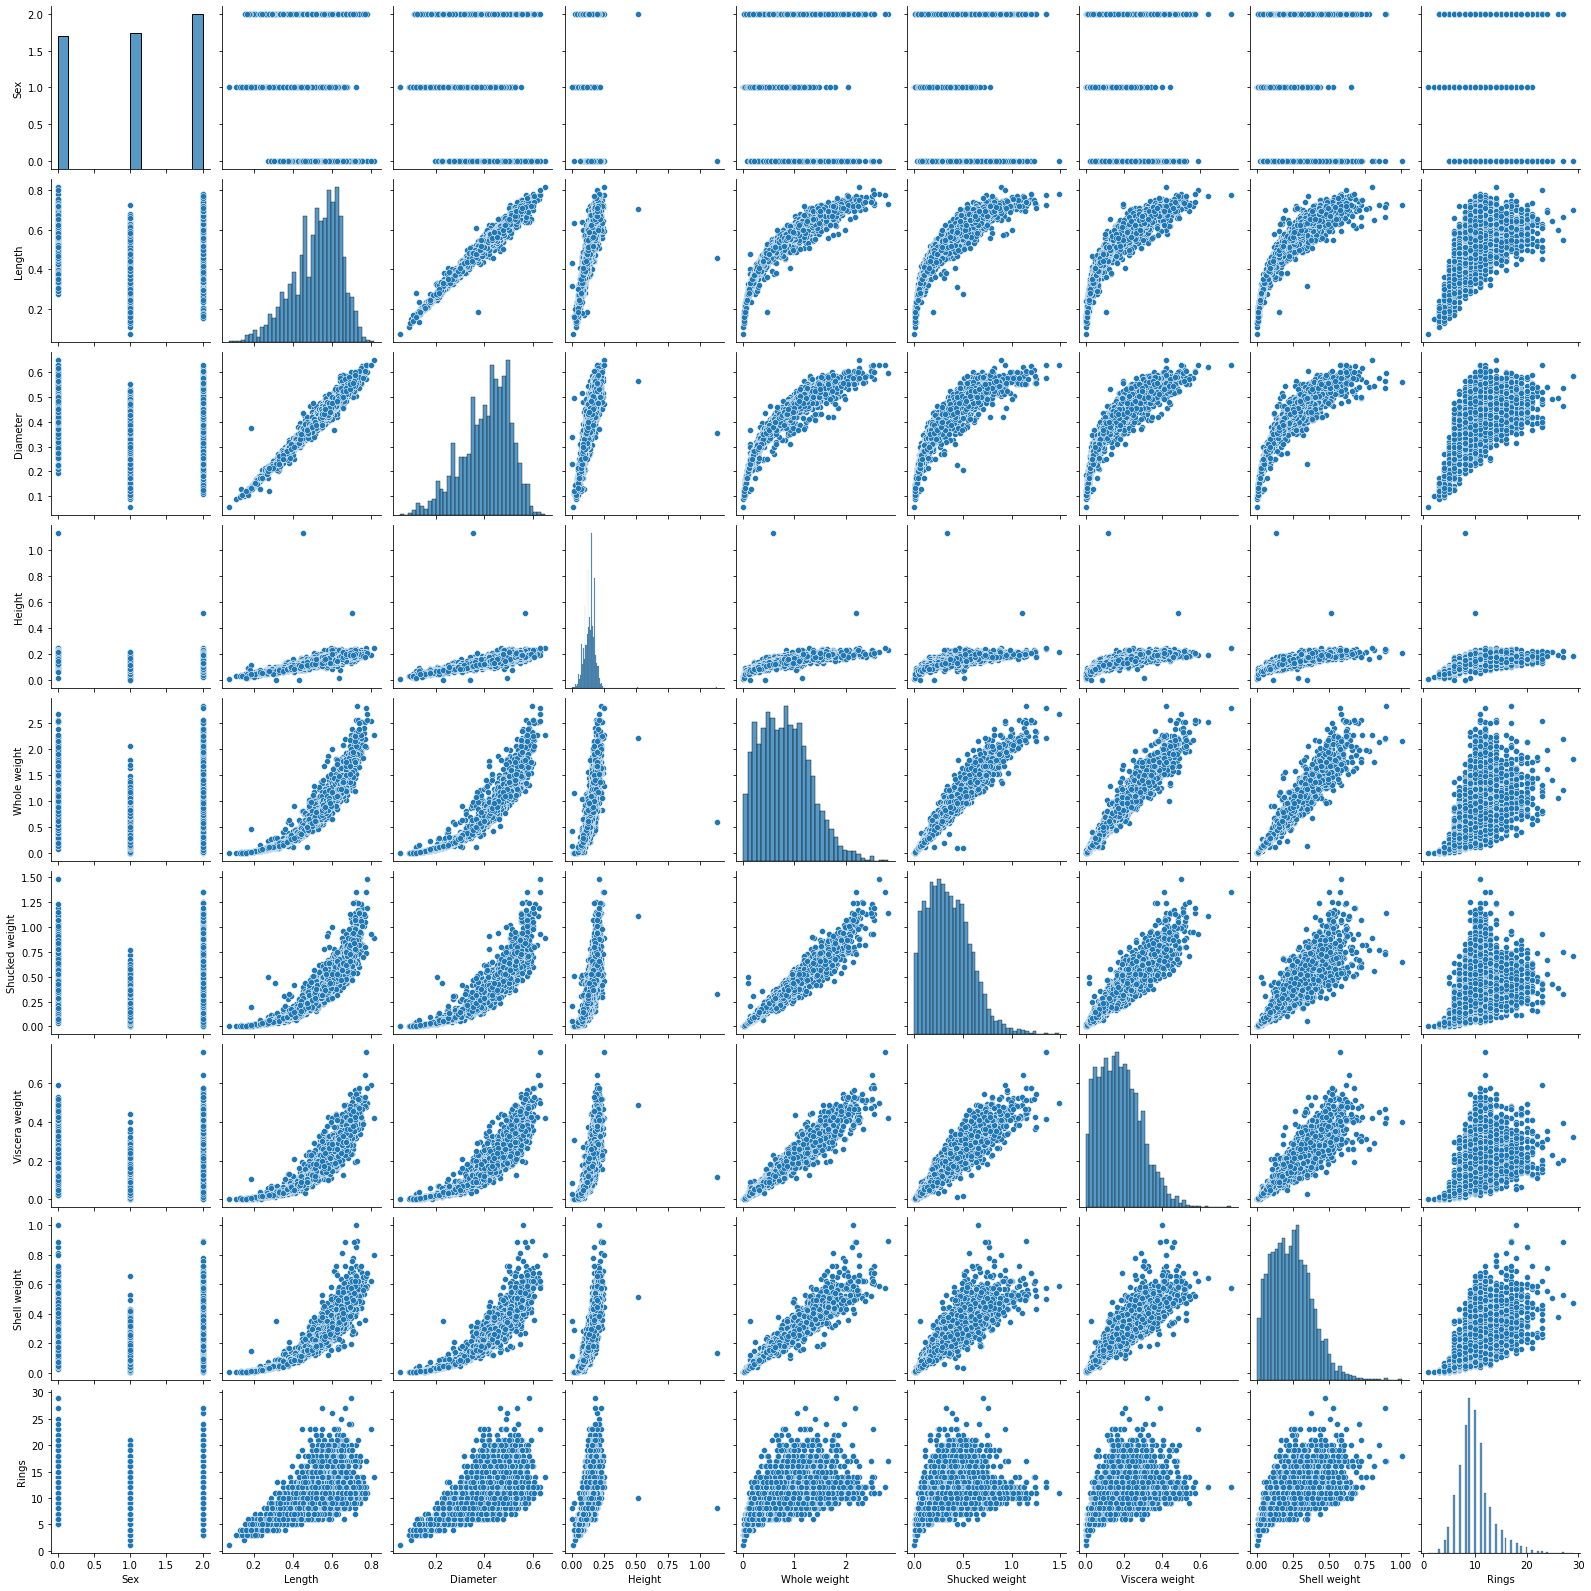

In [41]:
sns.pairplot(df)

In [42]:
corr = df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


array([<AxesSubplot:title={'center':'Sex'}>,
       <AxesSubplot:title={'center':'Length'}>,
       <AxesSubplot:title={'center':'Diameter'}>,
       <AxesSubplot:title={'center':'Height'}>,
       <AxesSubplot:title={'center':'Whole weight'}>,
       <AxesSubplot:title={'center':'Shucked weight'}>,
       <AxesSubplot:title={'center':'Viscera weight'}>,
       <AxesSubplot:title={'center':'Shell weight'}>,
       <AxesSubplot:title={'center':'Rings'}>], dtype=object)

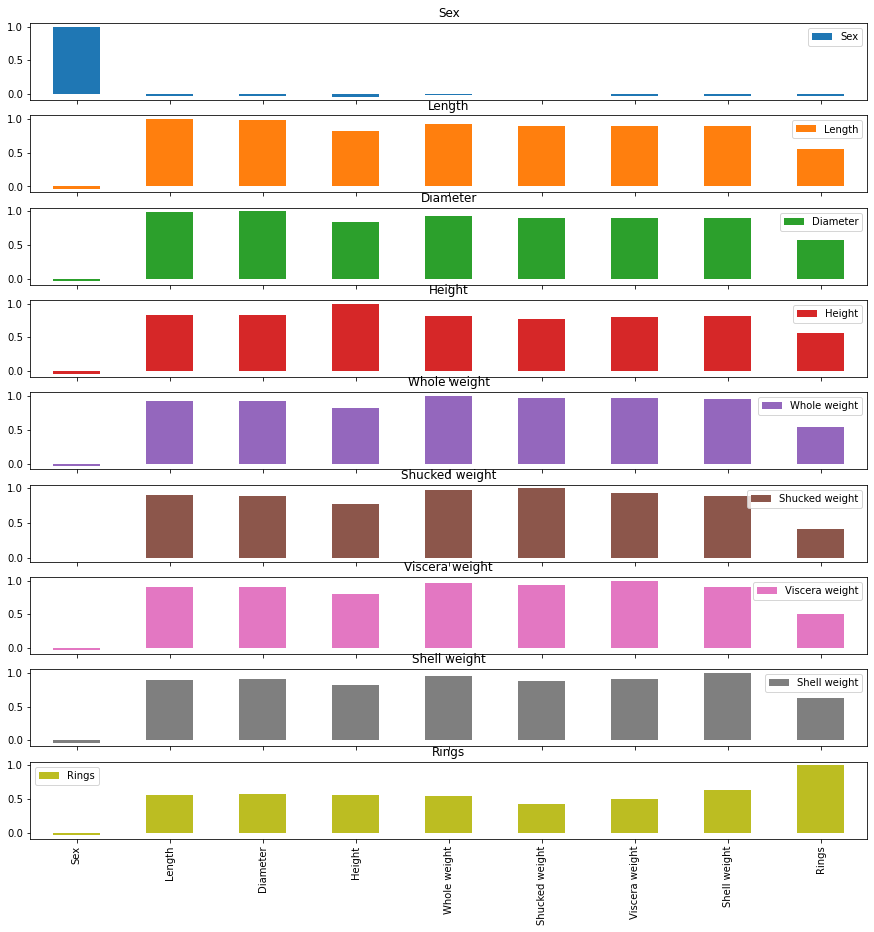

In [43]:
corr.plot(kind='bar',subplots = True,figsize = (15,15))

<AxesSubplot:>

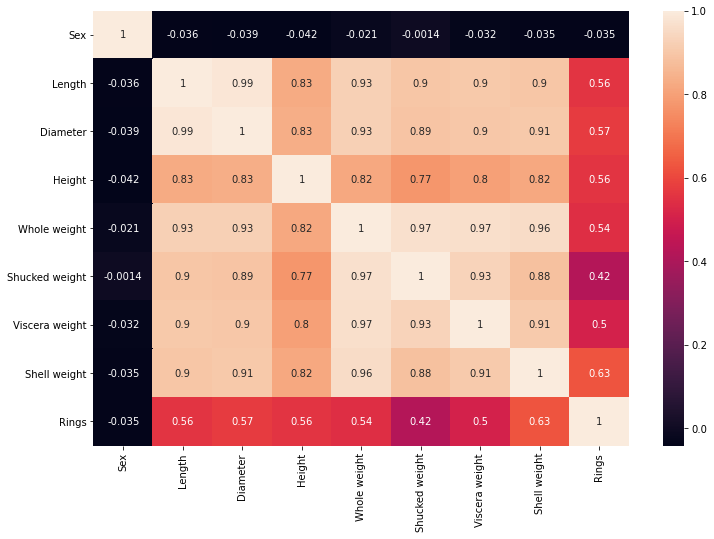

In [44]:
corr_map = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_map,annot = True)

Some column has same correlation hence muliti collinearity is present.
Columns having same corelation are
Diameter
Height
Whole weight

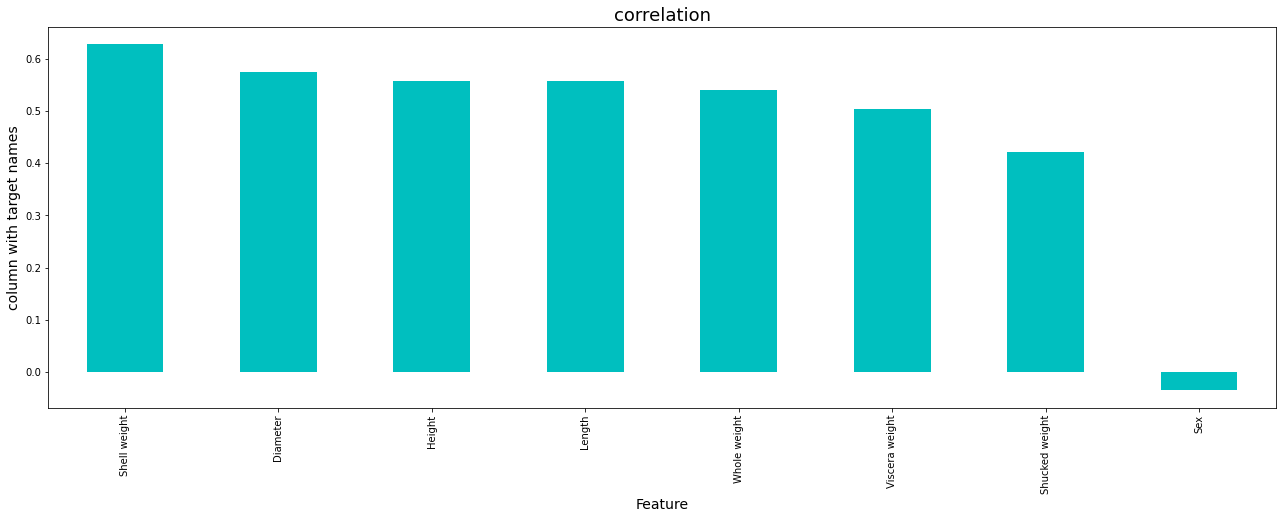

In [45]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending =False).drop(['Rings']).plot(kind ='bar',color ='c')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel('column with target names',fontsize = 14)
plt.title("correlation",fontsize = 18)
plt.show()

# Plotting the outliers

In [46]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:>

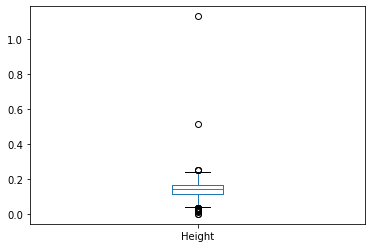

In [47]:
df['Height'].plot.box()

<AxesSubplot:>

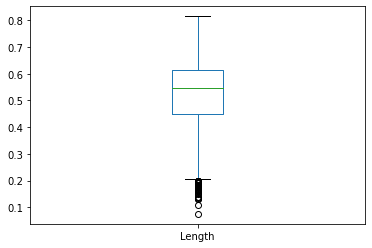

In [48]:
df["Length"].plot.box()

<AxesSubplot:>

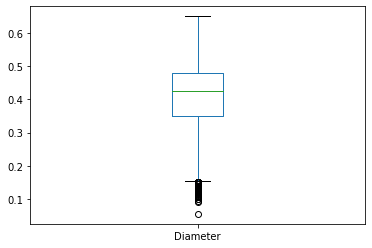

In [49]:
df['Diameter'].plot.box()

Sex                  AxesSubplot(0.125,0.125;0.0731132x0.755)
Length            AxesSubplot(0.212736,0.125;0.0731132x0.755)
Diameter          AxesSubplot(0.300472,0.125;0.0731132x0.755)
Height            AxesSubplot(0.388208,0.125;0.0731132x0.755)
Whole weight      AxesSubplot(0.475943,0.125;0.0731132x0.755)
Shucked weight    AxesSubplot(0.563679,0.125;0.0731132x0.755)
Viscera weight    AxesSubplot(0.651415,0.125;0.0731132x0.755)
Shell weight      AxesSubplot(0.739151,0.125;0.0731132x0.755)
Rings             AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

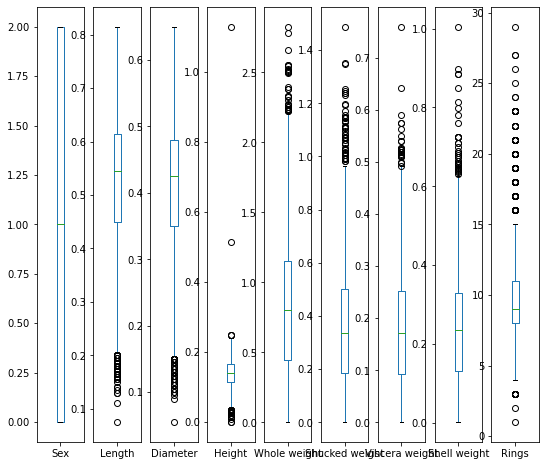

In [50]:
df.plot(kind = 'box',subplots = True,figsize =(9,8))

In [51]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [52]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [53]:
thersold = 3
print(np.where (z>3))


(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [54]:
df_new = df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
x = df_new.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [57]:
x.shape

(4027, 8)

In [58]:
y = df_new.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [59]:
y.shape

(4027,)

In [60]:
def vif_calc():
    vif = pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [61]:
vif_calc()

   VIF Factor        Features
0    2.586539             Sex
1  711.017756          Length
2  762.862946        Diameter
3   92.050181          Height
4  441.600560    Whole weight
5  108.511496  Shucked weight
6   65.669278  Viscera weight
7   94.849108    Shell weight


In [62]:
df_new.drop(['Length','Shucked weight'],axis = 1,inplace = True)

In [63]:
df_new

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [64]:
from sklearn.preprocessing import power_transform
x = power_transform (x,method = "yeo-johnson")

In [65]:
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [67]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =.33,random_state = 55)

In [68]:
x_train.shape

(2698, 8)

In [69]:
y_train.shape

(2698,)

In [70]:
x_test.shape

(1329, 8)

In [71]:
y_test.shape

(1329,)

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.06363375, -0.45615593,  0.53237615,  0.63682648,  4.0250453 ,
       -3.97521627, -0.60662935,  1.45377427])

In [73]:
lr.intercept_

9.752226564884934

In [74]:
lr.score(x_train,y_train)

0.5010513408642641

In [75]:
pred = lr.predict(x_test)
pred

array([11.05077227,  8.4631173 ,  8.63639875, ..., 12.50945732,
        9.89524844, 10.30874381])

In [76]:
print("Print the predicted values:",pred)

Print the predicted values: [11.05077227  8.4631173   8.63639875 ... 12.50945732  9.89524844
 10.30874381]


In [77]:
preddf = pd.DataFrame(data = pred)
preddf

,0
0,11.050772
1,8.463117
2,8.636399
3,8.308196
4,12.932611
...,...
1324,11.806291
1325,11.823849
1326,12.509457
1327,9.895248


In [78]:
lr.score(x_test,y_test)

0.5333301717503862

In [79]:
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean square:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error : 1.4876462767579397
Mean squared error: 3.9216862589983545
Root mean square: 1.9803247862404678


In [80]:
print('R2 score:',r2_score(y_test,pred))

R2 score: 0.5333301717503862


In [81]:
t = np.array([2,0.365,0.095,0.5140,0.1010,0.1500])
t

array([2.   , 0.365, 0.095, 0.514, 0.101, 0.15 ])

In [82]:
t.shape

(6,)

In [83]:
t = t.reshape(1,-1)
t

array([[2.   , 0.365, 0.095, 0.514, 0.101, 0.15 ]])

In [84]:
from sklearn.model_selection import cross_val_score

score  = cross_val_score(lr,x,y,cv = 2)
print(score)
print(score.mean())
print(score.std())

[0.5029855  0.51438309]
0.5086842921381733
0.005698792975971034


In [85]:
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
pred=lr.predict(x_train)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [12.66716691  7.56101038  9.92340172 ...  6.22562259  6.55244722
 14.42161759]
actual score: 3127     9
3153     9
1126     9
1247     8
255     15
        ..
151      9
430     18
1200    10
3273    13
725     17
Name: Rings, Length: 1329, dtype: int64


In [87]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
rdg=Ridge(alpha=0.0001,random_state=55)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.501051340863564

In [89]:
rdg.coef_

array([ 0.06363371, -0.45615518,  0.53237528,  0.63682689,  4.02501818,
       -3.97520323, -0.60662335,  1.45378263])

In [90]:
predict=rdg.predict(x_test)

In [91]:
predict

array([11.05077317,  8.46311824,  8.63640067, ..., 12.50945723,
        9.89524937, 10.30874292])

In [92]:
r2_score(y_test,predict)

0.5333301413767442

In [93]:
lso=Lasso(alpha=0.0001,random_state=45)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.5010508904373792

In [94]:
lso.coef_

array([ 0.06349919, -0.45120424,  0.5276159 ,  0.63682937,  4.00675623,
       -3.9670903 , -0.60146132,  1.45893372])

In [95]:
predict1=lso.predict(x_test)
predict1

array([11.05181259,  8.46331514,  8.63761513, ..., 12.51114214,
        9.89563745, 10.30920775])

In [96]:
r2_score(y_test,predict1)

0.5332927959922685

# Approaching more regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [99]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(x_train,y_train)
print("DTC score:",dtr.score(x_train,y_train))

dtr_pred=dtr.predict(x_test)

print("r2_score:",r2_score(y_test,dtr_pred))
print("Mean Squared error:",mean_squared_error(y_test,dtr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,dtr_pred)))

DTC score: 1.0
r2_score: 0.20516292649062795
Mean Squared error: 6.679458239277652
Root Mean Squared error: 2.584464787780567


In [100]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR score:",knr.score(x_train,y_train))

knr_pred=knr.predict(x_test)

print("r2_score:",r2_score(y_test,knr_pred))
print("Mean Squared error:",mean_squared_error(y_test,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,knr_pred)))

KNR score: 0.6496748578061551
r2_score: 0.48355736480935485
Mean Squared error: 4.339954853273138
Root Mean Squared error: 2.083255830010596


In [101]:
svr=SVR()
svr.fit(x_train,y_train)
print("SVR score:",svr.score(x_train,y_train))

svr_pred=svr.predict(x_test)

print("r2_score:",r2_score(y_test,svr_pred))
print("Mean Squared error:",mean_squared_error(y_test,svr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,svr_pred)))

SVR score: 0.5311192834903333
r2_score: 0.5493717293865666
Mean Squared error: 3.7868801233827276
Root Mean Squared error: 1.9459907819367304


In [102]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
print("SGDRegressor score:",sgdr.score(x_train,y_train))

sgdr_pred=sgdr.predict(x_test)

print("r2_score:",r2_score(y_test,sgdr_pred))
print("Mean Squared error:",mean_squared_error(y_test,sgdr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test,sgdr_pred)))

SGDRegressor score: 0.4934918585151695
r2_score: 0.5226543131351962
Mean Squared error: 4.011401439838814
Root Mean Squared error: 2.002848331711319


# Apporaching Ensemble Method

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42) #by default=100
rf.fit(x_train,y_train)
predict=rf.predict(x_test)

print(predict)
print("RFScore:",rf.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[10.74  7.63  9.03 ... 12.41 10.2  11.88]
RFScore: 0.9330955241457586
r2_score: 0.565995982174679


In [104]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50,random_state=42) #by default=100
ada.fit(x_train,y_train)
predict=ada.predict(x_test)

print(predict)
print("AdaBoostScore:",ada.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[11.36620926 10.10169492 10.54823529 ... 13.02431611 11.01184834
 10.90734824]
AdaBoostScore: 0.38532798043827743
r2_score: 0.35227249438789143


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor() #by default=100
grad.fit(x_train,y_train)
predict=grad.predict(x_test)

print(predict)
print("Gradient Score:",grad.score(x_train,y_train))
print("r2_score:",r2_score(y_test,predict))

[10.99939961  8.73988504  9.02004713 ... 12.2336104  11.21508765
 11.34558672]
Gradient Score: 0.6440783158695353
r2_score: 0.5516058400122837


In [106]:
pred=rf.predict(x_test)
pred

array([10.74,  7.63,  9.03, ..., 12.41, 10.2 , 11.88])

In [107]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,10.74
1,7.63
2,9.03
3,7.66
4,15.72
...,...
1324,11.34
1325,12.82
1326,12.41
1327,10.20


# Saving the best model

In [108]:
import joblib

joblib.dump(dtr,'dtrmodel.obj')
dtrloadmodel=joblib.load('dtrmodel.obj')
dtrloadmodel.predict(x_test)

array([ 8.,  7.,  8., ..., 12., 10., 11.])

# Conclusion 

In [109]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dtr.predict(x_test))
df_conc=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_conc

,Original,Predicted
0,9,8.0
1,9,7.0
2,9,8.0
3,8,7.0
4,15,19.0
...,...,...
1324,9,11.0
1325,18,8.0
1326,10,12.0
1327,13,10.0
